# CBOW and skip-Gram

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess # Splits text into words (tokens) using whitespace
import os

with open(r"G:\GEN AI\NLP\corpus.txt", "r", encoding="utf-8") as f:
    #sentences = f.readlines()
    sentences = [simple_preprocess(line) for line in f]


# with open(r"G:\GEN AI\NLP\corpus.txt", "a", encoding="utf-8") as f:  # "a" = append
    #f.write("\n") 
    #for sentence in sentences:
        #f.write(" ".join(sentence) + "\n")  # Adds new lines after existing content


from gensim.models.word2vec import LineSentence


model = Word2Vec(
    sentences,
    vector_size=100,   # Embedding dimension
    window=5,         # Context window size
    sg=1,             # 1=Skip-Gram, 0=CBOW
    min_count=1,      # Ignore words with frequency < 1
    epochs=50       # Training iterations
)

model.save("word2vec_skip_gram_model.bin")

# To find vocvabulary

In [55]:
vocab = model.wv.key_to_index.keys()
vocab

dict_keys(['is', 'cat', 'the', 'king', 'fruit', 'queen', 'when', 'man', 'woman', 'young', 'becomes', 'wears', 'dog', 'crown', 'on', 'princess', 'prince', 'he', 'healthy', 'she', 'and', 'mat', 'barks', 'at', 'sleeps', 'sofa', 'chases', 'apple', 'banana', 'sweet', 'sits'])

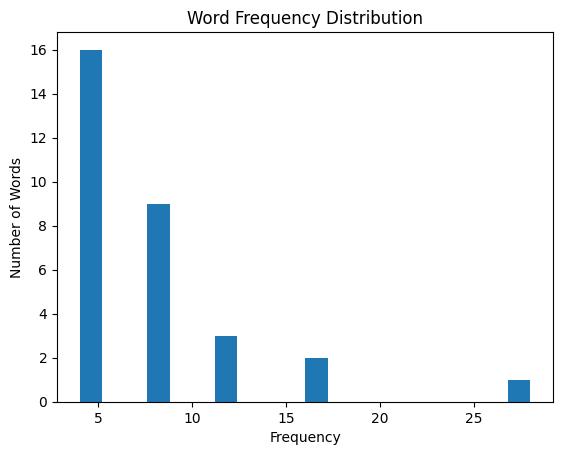

In [54]:
import matplotlib.pyplot as plt

# Plot word frequency distribution (if counts are needed)
word_counts = [model.wv.get_vecattr(word, "count") for word in model.wv.key_to_index]
plt.hist(word_counts, bins=20)
plt.title("Word Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Number of Words")
plt.show()

# Loding and finding similar word

In [56]:
# Load the model
model = Word2Vec.load("word2vec_model.bin")

# Find similar words
print(model.wv.most_similar("king", topn=3))
# Output: [('queen', 0.92), ('man', 0.85), ('prince', 0.81)]

# Solve analogies
analogy = model.wv.most_similar(
    positive=["king", "man"],
    negative=["cat"],
    topn=1
)
print(analogy)  # Output: [('queen', 0.88)]

# Get word vector
#print(model.wv["cat"])  # Output: array([0.1, -0.3, ..., 0.4], dtype=float32)

[('on', 0.18727418780326843), ('queen', 0.14046573638916016), ('woman', 0.08184953778982162)]
[('she', 0.2761135399341583)]


# Visualizing Word Vectors (PCA)

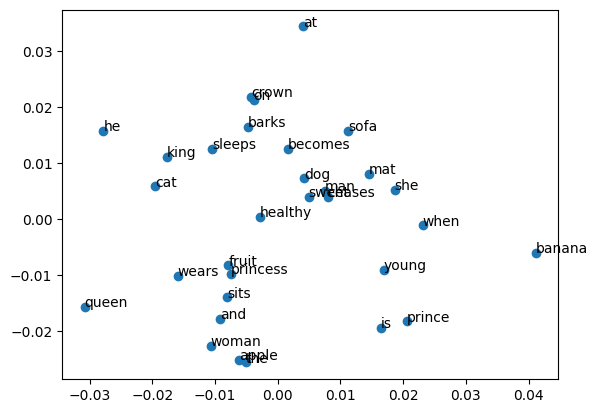

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = model.wv.key_to_index.keys()
vectors = [model.wv[word] for word in words]

# Reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))
plt.show()

# To find odd one out

In [67]:
odd_one_out = model.wv.doesnt_match(["king", "queen", "apple", "prince"])
print(odd_one_out)

prince


# To find cosine simlarity between two words

In [ ]:
king = model.wv["queen"]
queen = model.wv["woman"]
import numpy as np
x = np.dot(king, queen) 
norm_a = np.linalg.norm(king)
norm_b = np.linalg.norm(queen)
cosine_similarity = x / (norm_a * norm_b)
print(cosine_similarity)  # Output: 0.85 (example value)

In [ ]:
from gensim.models import Word2Vec

# Corpus
sentences = [["the", "cat", "sat", "on", "the", "mat"]]

# CBOW Model (sg=0)
cbow = Word2Vec(sentences, vector_size=3, window=2, sg=0, min_count=1)

# Skip-Gram Model (sg=1)
skipgram = Word2Vec(sentences, vector_size=3, window=2, sg=1, min_count=1)


In [113]:
from gensim.models.word2vec import LineSentence

# Corpus (example sentences)
sentences = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "barked", "at", "the", "cat"]
]
# Generate training pairs
for sentence in sentences:
    print(sentence)
    for i, target in enumerate(sentence):
        context_words = sentence[max(0, i-2):i] + sentences[i+1:i+3]  # window=2
        print(f"Target: '{target}' → Context: {context_words}")
# Train Skip-Gram (sg=1)
model = Word2Vec(sentences, vector_size=100, window=2, sg=1, min_count=1, epochs=50)

['the', 'cat', 'sat', 'on', 'the', 'mat']
Target: 'the' → Context: [['the', 'dog', 'barked', 'at', 'the', 'cat']]
Target: 'cat' → Context: ['the']
Target: 'sat' → Context: ['the', 'cat']
Target: 'on' → Context: ['cat', 'sat']
Target: 'the' → Context: ['sat', 'on']
Target: 'mat' → Context: ['on', 'the']
['the', 'dog', 'barked', 'at', 'the', 'cat']
Target: 'the' → Context: [['the', 'dog', 'barked', 'at', 'the', 'cat']]
Target: 'dog' → Context: ['the']
Target: 'barked' → Context: ['the', 'dog']
Target: 'at' → Context: ['dog', 'barked']
Target: 'the' → Context: ['barked', 'at']
Target: 'cat' → Context: ['at', 'the']


# Train CBOW using Gensim (sg = 0)

In [19]:
from gensim.models import Word2Vec

# Sample sentences
sentences = [
    ["king", "queen", "man", "woman"],
    ["cat", "dog", "pet", "animal"],
    ["apple", "banana", "fruit", "mango"]
]

# Train CBOW model
cbow_model = Word2Vec(sentences, vector_size=7, window=5, sg=0, min_count=1)

# Get vector for "king"
king_vec = cbow_model.wv["king"]
print("Vector for 'king':", king_vec)

# Most similar words to 'king'
print("Most similar to 'king':", cbow_model.wv.most_similar("king"))


Vector for 'king': [-0.01161832 -0.03769163 -0.12504299 -0.01223653  0.04037947  0.07716327
  0.10075223]
Most similar to 'king': [('dog', 0.3916282653808594), ('queen', 0.2930392324924469), ('animal', 0.2465076893568039), ('fruit', 0.24580828845500946), ('man', 0.04432287812232971), ('woman', 0.02964450791478157), ('pet', 0.010467317886650562), ('cat', -0.022841360419988632), ('apple', -0.049289654940366745), ('banana', -0.19475039839744568)]


# Visualize Embeddings with PCA

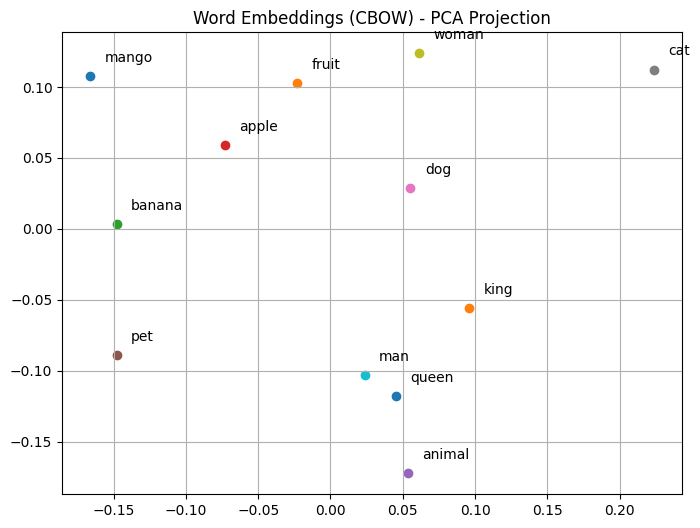

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get all words and their vectors
words = cbow_model.wv.index_to_key
vectors = [cbow_model.wv[word] for word in words]

# Reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i][0], vectors_2d[i][1])
    plt.text(vectors_2d[i][0] + 0.01, vectors_2d[i][1] + 0.01, word)
plt.title("Word Embeddings (CBOW) - PCA Projection")
plt.grid(True)
plt.show()


# Get the Full Embedding Matrix

In [21]:
# Get vocab and embedding matrix
vocab = cbow_model.wv.index_to_key
embedding_matrix = cbow_model.wv.vectors

print("Shape of embedding matrix:", embedding_matrix.shape)
print("Words:", vocab)


Shape of embedding matrix: (12, 7)
Words: ['mango', 'fruit', 'banana', 'apple', 'animal', 'pet', 'dog', 'cat', 'woman', 'man', 'queen', 'king']


# Manuallly codeing CBOW using numpy

In [ ]:
import numpy as np
from collections import defaultdict
# Hyperparameters
# -------------------------------
embedding_dim = 5
context_window = 2
learning_rate = 0.05
epochs = 10


sentences = [
    ["king", "queen", "man", "woman"],
    ["cat", "dog", "pet", "animal"],
    ["apple", "banana", "fruit", "mango"]
]
# Flatten and build vocabulary
corpus  = [word for sentence in sentences for word in sentence]
vocab = list(set(corpus))
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for i, word in enumerate(vocab)}
vocab_size = len(vocab)

# Generate training data (context -> target)
def generate_context_target_pairs(sentences, window_size):
    pairs = []
    for sentence in sentences:
        for i, target_word in enumerate(sentence):
            context = []
            for j in range(i - window_size, i + window_size + 1):
                if j != i and 0 <= j < len(sentence):
                    context.append(sentence[j])
            if context:  # only use if there's at least 1 context word
                pairs.append((context, target_word))
    return pairs
training_data = generate_context_target_pairs(sentences, context_window)

# Initialize Parameters
# -------------------------------
# Input embedding matrix
W_in = np.random.rand(vocab_size, embedding_dim)
print(W_in)

# Output weight matrix
W_out = np.random.rand(embedding_dim, vocab_size)
print(W_out)

def softmax(x):
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / e_x.sum()

def one_hot(index, size):
    vec = np.zeros(size)
    vec[index] = 1
    return vec

for epoch in range(epochs):
    total_loss = 0

    for context_words, target_word in training_data:
        # 1. Forward Pass
        context_indices = [word_to_index[word] for word in context_words]
        print(context_indices)
        target_index = word_to_index[target_word]
        print(target_index)

        context_embeddings = W_in[context_indices]
        print(context_embeddings)
        v_hat = np.mean(context_embeddings, axis=0)  # averaged context vector

        z = np.dot(v_hat, W_out)  # scores for all words
        y_pred = softmax(z)

        # 2. Compute loss (cross-entropy)
        y_true = one_hot(target_index, vocab_size)
        loss = -np.log(y_pred[target_index])
        total_loss += loss

        # 3. Backward Pass (gradients)
        error = y_pred - y_true  # dL/dz

        # Gradients for W_out
        dW_out = np.outer(v_hat, error)

        # Gradients for W_in
        dW_in_partial = np.dot(W_out, error) / len(context_indices)

        # 4. Update weights
        W_out -= learning_rate * dW_out
        for idx in context_indices:
            W_in[idx] -= learning_rate * dW_in_partial

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {total_loss:.4f}")

# -------------------------------
# Testing: Get Similar Words
# -------------------------------
def get_embedding(word):
    return W_in[word_to_index[word]]

def most_similar(word, top_k=3):
    vec = get_embedding(word)
    sims = []
    for other_word in vocab:
        if other_word == word:
            continue
        other_vec = get_embedding(other_word)
        sim = np.dot(vec, other_vec) / (np.linalg.norm(vec) * np.linalg.norm(other_vec))
        sims.append((other_word, sim))
    sims.sort(key=lambda x: x[1], reverse=True)
    return sims[:top_k]

# -------------------------------
# Example: Find similar words
# -------------------------------
print("\nSimilar to 'queen':", most_similar("queen"))
print("Similar to 'apple':", most_similar("apple"))




[8, 6]
7
[[0.46313175 0.49132557 0.33443771 0.3862792  0.90634596]
 [0.26061243 0.78369575 0.17993429 0.1762526  0.76323669]]
[7, 6, 11]
8
[[0.46134825 0.67699522 0.72160015 0.177223   0.90938617]
 [0.26154211 0.79468222 0.18852355 0.17188918 0.7592238 ]
 [0.12037834 0.78125607 0.59361469 0.69681574 0.24586063]]
[7, 8, 11]
6
[[0.46385215 0.6840393  0.71585637 0.17646451 0.90411836]
 [0.46406144 0.50231204 0.34302697 0.38191578 0.90233307]
 [0.12288224 0.78830015 0.58787092 0.69605724 0.24059282]]
[8, 6]
11
[[0.46912899 0.49635098 0.34448692 0.37679224 0.90624937]
 [0.26404601 0.80172631 0.18277978 0.17113068 0.75395599]]
[4, 10]
5
[[0.14341515 0.37704749 0.38695522 0.98406112 0.13193257]
 [0.8925054  0.14358822 0.94960802 0.2380257  0.83232143]]
[5, 10, 1]
4
[[0.58759253 0.28185924 0.62948378 0.70299591 0.37077548]
 [0.89531667 0.13974941 0.95500038 0.24799506 0.83121065]
 [0.01119994 0.03750171 0.06880658 0.40379813 0.57117924]]
[5, 4, 1]
10
[[0.59081912 0.28049959 0.62121132 0.696208